In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [2]:
url = 'https://en.m.wikipedia.org/wiki/UEFA_Euro_2024'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'lxml')

In [3]:
events = soup.find_all('table', class_='fevent')

home = []
score = []
away = []

for matches in events:
  home.append(matches.find('th', class_='fhome').get_text())
  score.append(matches.find('th', class_='fscore').get_text())
  away.append(matches.find('th', class_='faway').get_text())

dict_euro = {'Home': home, 'Score': score, 'Away': away}
df = pd.DataFrame(dict_euro)
df.head()

,Home,Score,Away
0,Germany,5–1,Scotland
1,Hungary,1–3,Switzerland
2,Germany,2–0,Hungary
3,Scotland,1–1,Switzerland
4,Switzerland,1–1,Germany


In [4]:
df.to_csv('Dataset Euro 2024.csv', index=False)

In [5]:
df.shape

(51, 3)

In [6]:
df.isnull().sum()

Home     0
Score    0
Away     0
dtype: int64

In [7]:
df['Home'] = df['Home'].str.strip()
df['Away'] = df['Away'].str.strip()

In [8]:
df_euro = df[(df['Home'].isin(['Spain', 'England'])) |
                           (df['Away'].isin(['Spain', 'England']))]
df_euro.reset_index(drop=True, inplace=True)
df_euro

,Home,Score,Away
0,Spain,3–0,Croatia
1,Spain,1–0,Italy
2,Albania,0–1,Spain
3,Serbia,0–1,England
4,Denmark,1–1,England
5,England,0–0,Slovenia
6,England,2–1 (a.e.t.),Slovakia
7,Spain,4–1,Georgia
8,Spain,2–1 (a.e.t.),Germany
9,England,1–1 (a.e.t.),Switzerland


In [9]:
df_euro.Score.unique()

array(['3–0', '1–0', '0–1', '1–1', '0–0', '2–1 (a.e.t.)', '4–1',
       '1–1 (a.e.t.)', '2–1', '1–2'], dtype=object)

In [10]:
df_euro['Score'] = df_euro['Score'].str.replace('[^\d-]', '', regex=True)
df_euro

<ipython-input-10-aca85dd4397c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_euro['Score'] = df_euro['Score'].str.replace('[^\d-]', '', regex=True)


,Home,Score,Away
0,Spain,30,Croatia
1,Spain,10,Italy
2,Albania,01,Spain
3,Serbia,01,England
4,Denmark,11,England
5,England,00,Slovenia
6,England,21,Slovakia
7,Spain,41,Georgia
8,Spain,21,Germany
9,England,11,Switzerland


In [11]:
df_euro['Home'] = df_euro['Home'].str.strip()
df_euro['Away'] = df_euro['Away'].str.strip()

<ipython-input-11-91772467a69f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_euro['Home'] = df_euro['Home'].str.strip()
<ipython-input-11-91772467a69f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_euro['Away'] = df_euro['Away'].str.strip()


In [12]:
df_euro[['Gol_home', 'Gol_away']] = df_euro['Score'].str.extract(r'(\d)(\d)').astype(int)
df_euro

<ipython-input-12-1d7094ed2fc7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_euro[['Gol_home', 'Gol_away']] = df_euro['Score'].str.extract(r'(\d)(\d)').astype(int)
<ipython-input-12-1d7094ed2fc7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_euro[['Gol_home', 'Gol_away']] = df_euro['Score'].str.extract(r'(\d)(\d)').astype(int)


,Home,Score,Away,Gol_home,Gol_away
0,Spain,30,Croatia,3,0
1,Spain,10,Italy,1,0
2,Albania,01,Spain,0,1
3,Serbia,01,England,0,1
4,Denmark,11,England,1,1
5,England,00,Slovenia,0,0
6,England,21,Slovakia,2,1
7,Spain,41,Georgia,4,1
8,Spain,21,Germany,2,1
9,England,11,Switzerland,1,1


In [13]:
df_euro.drop(columns=['Score'], inplace=True)

<ipython-input-13-ac82c66e69f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_euro.drop(columns=['Score'], inplace=True)


In [14]:
df_euro.rename(columns={'Gol_home': 'GolHome',
                        'Gol_away': 'GolAway'}, inplace=True)

<ipython-input-14-f2c00fd4d3bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_euro.rename(columns={'Gol_home': 'GolHome',


In [15]:
df_euro.loc[(df_euro['Home'] == 'Spain') & (df_euro['Away'] == 'England'), ['GolHome', 'GolAway']] = 0, 0

In [16]:
df_euro

,Home,Away,GolHome,GolAway
0,Spain,Croatia,3,0
1,Spain,Italy,1,0
2,Albania,Spain,0,1
3,Serbia,England,0,1
4,Denmark,England,1,1
5,England,Slovenia,0,0
6,England,Slovakia,2,1
7,Spain,Georgia,4,1
8,Spain,Germany,2,1
9,England,Switzerland,1,1


In [17]:
data = '/content/Stats Spain And England.csv'

df_stat = pd.read_csv(data)
df_stat.head()

,Ratings,Total Shots,Possesion,Pass Succes,Dribbles,Aerials Won,Tackles,Corners,Dispossessed
0,7.18,11.0,46.7,84.0,12.0,19.0,14.0,5.0,8.0
1,6.85,20.0,57.1,91.0,14.0,9.0,16.0,5.0,14.0
2,6.89,16.0,59.0,90.0,6.0,15.0,16.0,6.0,5.0
3,6.78,5.0,53.2,90.0,8.0,14.0,9.0,1.0,3.0
4,6.57,12.0,49.1,86.0,11.0,13.0,10.0,2.0,8.0


In [18]:
df_stat.isnull().sum()

Ratings         3
Total Shots     3
Possesion       3
Pass Succes     3
Dribbles        3
Aerials Won     3
Tackles         3
Corners         3
Dispossessed    3
dtype: int64

In [19]:
df_stat.dropna(inplace=True)

In [20]:
df_stat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 0 to 12
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ratings       13 non-null     float64
 1   Total Shots   13 non-null     float64
 2   Possesion     13 non-null     float64
 3   Pass Succes   13 non-null     float64
 4   Dribbles      13 non-null     float64
 5   Aerials Won   13 non-null     float64
 6   Tackles       13 non-null     float64
 7   Corners       13 non-null     float64
 8   Dispossessed  13 non-null     float64
dtypes: float64(9)
memory usage: 1.0 KB


In [21]:
df_euro_2024 = pd.concat([df_euro, df_stat], axis=1)
df_euro_2024

,Home,Away,GolHome,GolAway,Ratings,Total Shots,Possesion,Pass Succes,Dribbles,Aerials Won,Tackles,Corners,Dispossessed
0,Spain,Croatia,3,0,7.18,11.0,46.7,84.0,12.0,19.0,14.0,5.0,8.0
1,Spain,Italy,1,0,6.85,20.0,57.1,91.0,14.0,9.0,16.0,5.0,14.0
2,Albania,Spain,0,1,6.89,16.0,59.0,90.0,6.0,15.0,16.0,6.0,5.0
3,Serbia,England,0,1,6.78,5.0,53.2,90.0,8.0,14.0,9.0,1.0,3.0
4,Denmark,England,1,1,6.57,12.0,49.1,86.0,11.0,13.0,10.0,2.0,8.0
5,England,Slovenia,0,0,6.47,12.0,73.4,91.0,5.0,7.0,5.0,6.0,6.0
6,England,Slovakia,2,1,6.76,16.0,63.0,88.0,14.0,22.0,15.0,9.0,9.0
7,Spain,Georgia,4,1,7.26,35.0,75.2,94.0,12.0,10.0,18.0,13.0,6.0
8,Spain,Germany,2,1,6.92,18.0,48.4,86.0,13.0,20.0,17.0,1.0,10.0
9,England,Switzerland,1,1,6.79,13.0,51.8,92.0,11.0,12.0,23.0,4.0,11.0


In [22]:
df_eda = df_euro_2024.copy()

In [23]:
df_eda['country'] = df_eda.apply(lambda x: x['Home'] if x['Home'] in ['Spain', 'England'] else x['Away'], axis=1)
df_eda.drop(columns=['Home', 'Away'], inplace=True)

In [24]:
df_eda_spain = df_eda[df_eda['country'] == 'Spain']
df_eda_england = df_eda[df_eda['country'] == 'England']

In [25]:
df_eda_spain.reset_index(drop=True, inplace=True)
df_eda_england.reset_index(drop=True, inplace=True)

In [26]:
df_eda_spain = df_eda_spain.iloc[:-1]

In [27]:
df_eda_england.drop(columns=['GolHome', 'GolAway'], inplace=True)

<ipython-input-27-6dca2f78ebd9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda_england.drop(columns=['GolHome', 'GolAway'], inplace=True)


In [28]:
df_eda_england

,Ratings,Total Shots,Possesion,Pass Succes,Dribbles,Aerials Won,Tackles,Corners,Dispossessed,country
0,6.78,5.0,53.2,90.0,8.0,14.0,9.0,1.0,3.0,England
1,6.57,12.0,49.1,86.0,11.0,13.0,10.0,2.0,8.0,England
2,6.47,12.0,73.4,91.0,5.0,7.0,5.0,6.0,6.0,England
3,6.76,16.0,63.0,88.0,14.0,22.0,15.0,9.0,9.0,England
4,6.79,13.0,51.8,92.0,11.0,12.0,23.0,4.0,11.0,England
5,6.56,9.0,58.3,92.0,6.0,8.0,10.0,0.0,7.0,England


In [29]:
df_eda_england['Gol'] = [1, 1, 0, 2, 1, 2]
df_eda_england

<ipython-input-29-0460d8244bd3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda_england['Gol'] = [1, 1, 0, 2, 1, 2]


,Ratings,Total Shots,Possesion,Pass Succes,Dribbles,Aerials Won,Tackles,Corners,Dispossessed,country,Gol
0,6.78,5.0,53.2,90.0,8.0,14.0,9.0,1.0,3.0,England,1
1,6.57,12.0,49.1,86.0,11.0,13.0,10.0,2.0,8.0,England,1
2,6.47,12.0,73.4,91.0,5.0,7.0,5.0,6.0,6.0,England,0
3,6.76,16.0,63.0,88.0,14.0,22.0,15.0,9.0,9.0,England,2
4,6.79,13.0,51.8,92.0,11.0,12.0,23.0,4.0,11.0,England,1
5,6.56,9.0,58.3,92.0,6.0,8.0,10.0,0.0,7.0,England,2


In [30]:
df_eda_spain.drop(columns=['GolAway', 'GolHome'], inplace=True)

In [31]:
df_eda_spain['Gol'] = [3, 1, 1, 4, 2, 2]
df_eda_spain

,Ratings,Total Shots,Possesion,Pass Succes,Dribbles,Aerials Won,Tackles,Corners,Dispossessed,country,Gol
0,7.18,11.0,46.7,84.0,12.0,19.0,14.0,5.0,8.0,Spain,3
1,6.85,20.0,57.1,91.0,14.0,9.0,16.0,5.0,14.0,Spain,1
2,6.89,16.0,59.0,90.0,6.0,15.0,16.0,6.0,5.0,Spain,1
3,7.26,35.0,75.2,94.0,12.0,10.0,18.0,13.0,6.0,Spain,4
4,6.92,18.0,48.4,86.0,13.0,20.0,17.0,1.0,10.0,Spain,2
5,6.45,6.0,58.1,88.0,4.0,5.0,11.0,4.0,10.0,Spain,2


<ipython-input-32-ac49a7133f12>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=['Spain', 'England'], y=[total_goals_spain, total_goals_england], width=0.5, palette='bright')


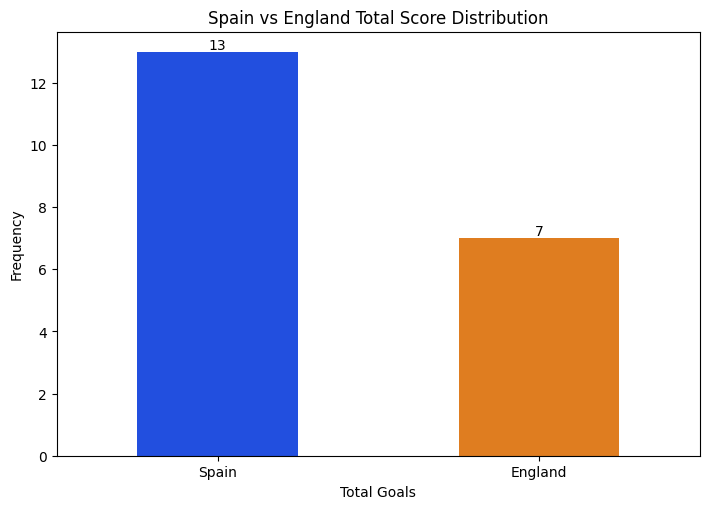

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

total_goals_spain = df_eda_spain['Gol'].sum()
total_goals_england = df_eda_england['Gol'].sum()

plt.figure(figsize=(7, 5))
ax = sns.barplot(x=['Spain', 'England'], y=[total_goals_spain, total_goals_england], width=0.5, palette='bright')
for container in ax.containers:
    ax.bar_label(container, size=10, label_type='edge')
plt.title('Spain vs England Total Score Distribution')
plt.tight_layout()
plt.xlabel('Total Goals')
plt.ylabel('Frequency')
plt.show()

<ipython-input-33-6910486aedce>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=['Spain', 'England'], y=[total_shots_spain, total_shots_england], width=0.5, palette='bright')


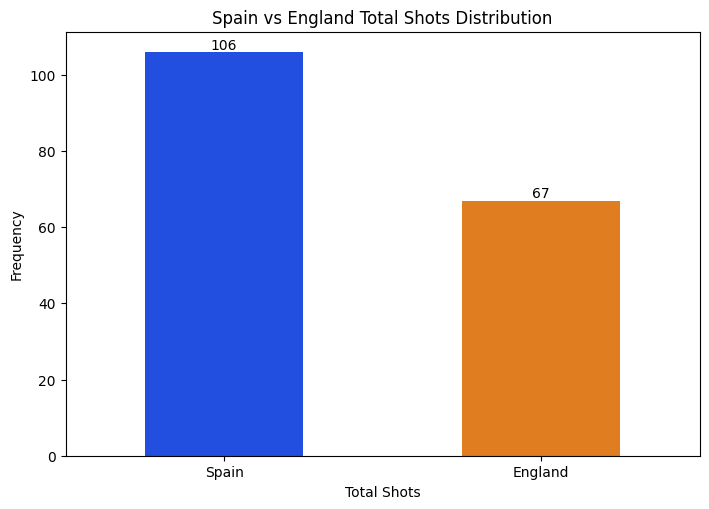

In [33]:
total_shots_spain = df_eda_spain['Total Shots'].sum()
total_shots_england = df_eda_england['Total Shots'].sum()

plt.figure(figsize=(7, 5))
ax = sns.barplot(x=['Spain', 'England'], y=[total_shots_spain, total_shots_england], width=0.5, palette='bright')
for container in ax.containers:
    ax.bar_label(container, size=10, label_type='edge')
plt.title('Spain vs England Total Shots Distribution')
plt.tight_layout()
plt.xlabel('Total Shots')
plt.ylabel('Frequency')
plt.show()

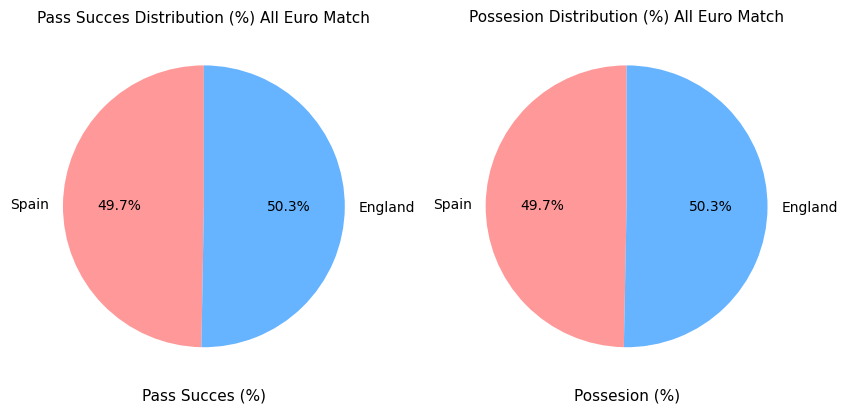

In [34]:
spain_pass_success = df_eda_spain['Pass Succes'].sum()
england_pass_success = df_eda_england['Pass Succes'].sum()

total_pass_success = spain_pass_success + england_pass_success
spain_pass_success_pct = (spain_pass_success / total_pass_success) * 100
england_pass_success_pct = (england_pass_success / total_pass_success) * 100

spain_possesion = df_eda_spain['Possesion'].sum()
england_possesion = df_eda_england['Possesion'].sum()

total_possesion = spain_possesion + england_possesion
spain_possesion_pct = (spain_possesion / total_possesion) * 100
england_possesion_pct = (england_possesion / total_possesion) * 100

df_possesion_pct = pd.DataFrame({
    'Country': ['Spain', 'England'],
    'Possesion (%)': [spain_possesion_pct, england_possesion_pct]
})

df_pass_success_pct = pd.DataFrame({
    'Country': ['Spain', 'England'],
    'Pass Succes (%)': [spain_pass_success_pct, england_pass_success_pct]
})


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.pie(df_pass_success_pct['Pass Succes (%)'], labels=df_pass_success_pct['Country'], autopct='%1.1f%%', startangle=90, colors=['#FF9999', '#66B3FF'])
plt.title('Pass Succes Distribution (%) All Euro Match', size=11)
plt.xlabel('Pass Succes (%)', size=11)

plt.subplot(1, 2, 2)
plt.pie(df_possesion_pct['Possesion (%)'], labels=df_possesion_pct['Country'], autopct='%1.1f%%', startangle=90, colors=['#FF9999', '#66B3FF'])
plt.title('Possesion Distribution (%) All Euro Match', size=11)
plt.xlabel('Possesion (%)', size=11)
plt.show()

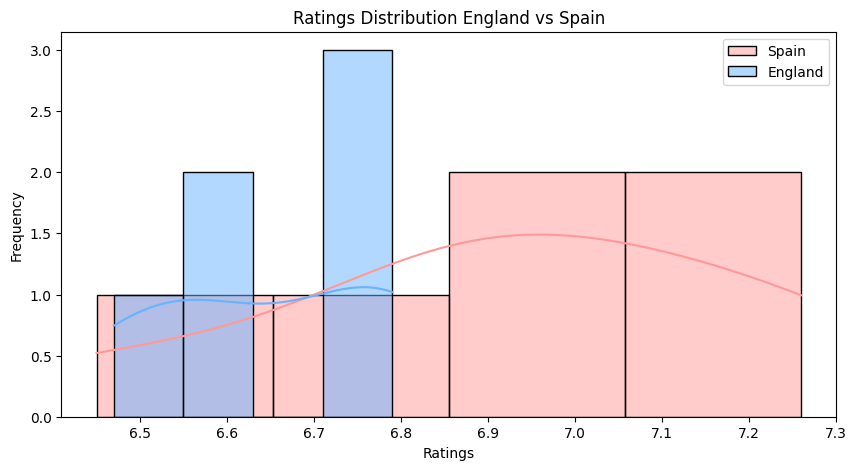

In [35]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df_eda_spain, x='Ratings', kde=True, color='#FF9999', label='Spain')
sns.histplot(data=df_eda_england, x='Ratings', kde=True, color='#66B3FF', label='England')
plt.legend()
plt.title('Ratings Distribution England vs Spain')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

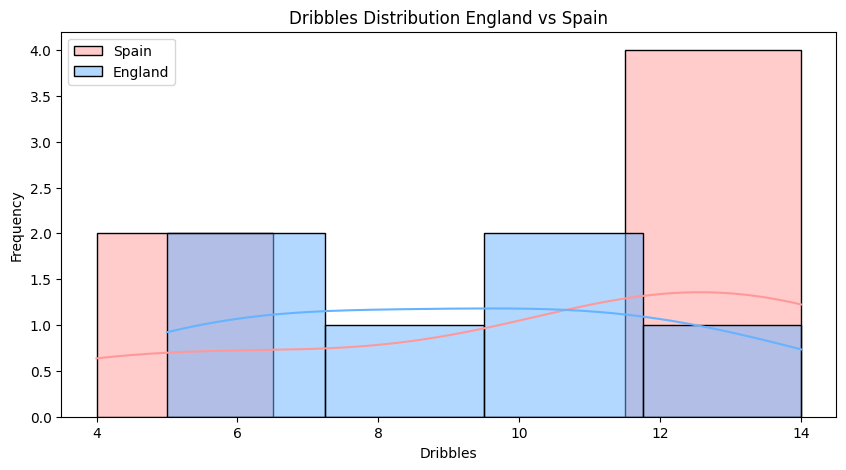

In [36]:
plt.figure(figsize=(10, 5))
sns.histplot(df_eda_spain, x='Dribbles', kde=True, color='#FF9999', label='Spain')
sns.histplot(df_eda_england, x='Dribbles', kde=True, color='#66B3FF', label='England')
plt.legend()
plt.title('Dribbles Distribution England vs Spain')
plt.xlabel('Dribbles')
plt.ylabel('Frequency')
plt.show()

In [37]:
df_corr = df_euro_2024.copy()
df_corr = df_corr.iloc[:, 2:13]

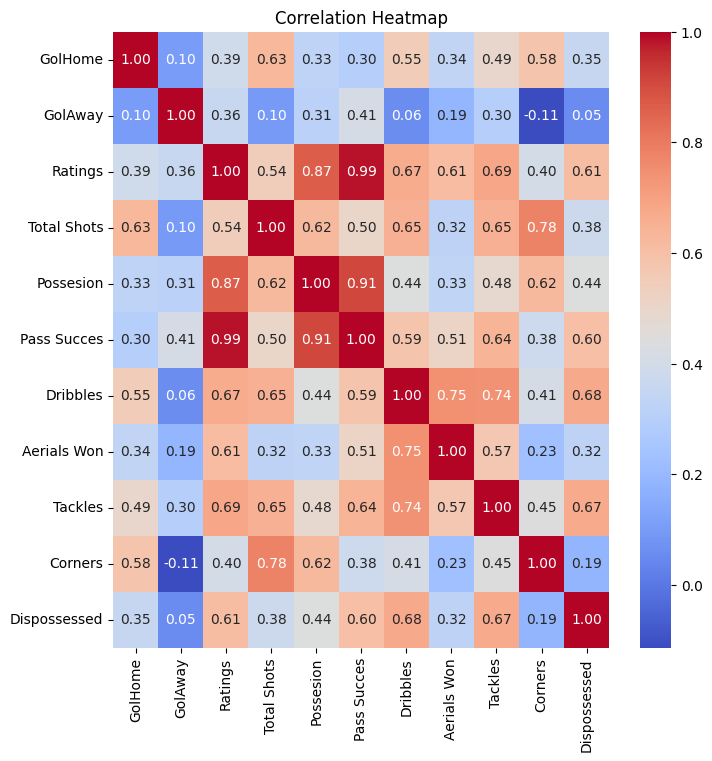

In [38]:
plt.figure(figsize=(8, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [39]:
df_euro_2024

,Home,Away,GolHome,GolAway,Ratings,Total Shots,Possesion,Pass Succes,Dribbles,Aerials Won,Tackles,Corners,Dispossessed
0,Spain,Croatia,3,0,7.18,11.0,46.7,84.0,12.0,19.0,14.0,5.0,8.0
1,Spain,Italy,1,0,6.85,20.0,57.1,91.0,14.0,9.0,16.0,5.0,14.0
2,Albania,Spain,0,1,6.89,16.0,59.0,90.0,6.0,15.0,16.0,6.0,5.0
3,Serbia,England,0,1,6.78,5.0,53.2,90.0,8.0,14.0,9.0,1.0,3.0
4,Denmark,England,1,1,6.57,12.0,49.1,86.0,11.0,13.0,10.0,2.0,8.0
5,England,Slovenia,0,0,6.47,12.0,73.4,91.0,5.0,7.0,5.0,6.0,6.0
6,England,Slovakia,2,1,6.76,16.0,63.0,88.0,14.0,22.0,15.0,9.0,9.0
7,Spain,Georgia,4,1,7.26,35.0,75.2,94.0,12.0,10.0,18.0,13.0,6.0
8,Spain,Germany,2,1,6.92,18.0,48.4,86.0,13.0,20.0,17.0,1.0,10.0
9,England,Switzerland,1,1,6.79,13.0,51.8,92.0,11.0,12.0,23.0,4.0,11.0


In [40]:
df_euro_2024.columns

Index(['Home', 'Away', 'GolHome', 'GolAway', 'Ratings', 'Total Shots',
       'Possesion', 'Pass Succes', 'Dribbles', 'Aerials Won', 'Tackles',
       'Corners', 'Dispossessed'],
      dtype='object')

In [41]:
df_euro_2024['Goal_Difference'] = df_euro_2024['GolHome'] - df_euro_2024['GolAway']

In [42]:
df_euro_2024.columns

Index(['Home', 'Away', 'GolHome', 'GolAway', 'Ratings', 'Total Shots',
       'Possesion', 'Pass Succes', 'Dribbles', 'Aerials Won', 'Tackles',
       'Corners', 'Dispossessed', 'Goal_Difference'],
      dtype='object')

In [43]:
home = df_euro_2024['Home'].nunique()
away = df_euro_2024['Away'].nunique()
print('Total Country Home n Away: ', home + away)

Total Country Home n Away:  16


In [44]:
country_encode = df_euro_2024[['Home', 'Away']]
country_encode = pd.get_dummies(country_encode)
country_encode.shape

(13, 16)

In [45]:
country_encode

,Home_Albania,Home_Denmark,Home_England,Home_Netherlands,Home_Serbia,Home_Spain,Away_Croatia,Away_England,Away_France,Away_Georgia,Away_Germany,Away_Italy,Away_Slovakia,Away_Slovenia,Away_Spain,Away_Switzerland
0,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False
5,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False
6,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False
7,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False
8,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False
9,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True


In [46]:
country_encode = country_encode.applymap(lambda x: 1 if x == True else 0)

df_euro_2024 = pd.concat([df_euro_2024, country_encode], axis=1)
df_euro_2024.drop(columns=['Home', 'Away'], inplace=True)
df_euro_2024

,GolHome,GolAway,Ratings,Total Shots,Possesion,Pass Succes,Dribbles,Aerials Won,Tackles,Corners,...,Away_Croatia,Away_England,Away_France,Away_Georgia,Away_Germany,Away_Italy,Away_Slovakia,Away_Slovenia,Away_Spain,Away_Switzerland
0,3,0,7.18,11.0,46.7,84.0,12.0,19.0,14.0,5.0,...,1,0,0,0,0,0,0,0,0,0
1,1,0,6.85,20.0,57.1,91.0,14.0,9.0,16.0,5.0,...,0,0,0,0,0,1,0,0,0,0
2,0,1,6.89,16.0,59.0,90.0,6.0,15.0,16.0,6.0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,6.78,5.0,53.2,90.0,8.0,14.0,9.0,1.0,...,0,1,0,0,0,0,0,0,0,0
4,1,1,6.57,12.0,49.1,86.0,11.0,13.0,10.0,2.0,...,0,1,0,0,0,0,0,0,0,0
5,0,0,6.47,12.0,73.4,91.0,5.0,7.0,5.0,6.0,...,0,0,0,0,0,0,0,1,0,0
6,2,1,6.76,16.0,63.0,88.0,14.0,22.0,15.0,9.0,...,0,0,0,0,0,0,1,0,0,0
7,4,1,7.26,35.0,75.2,94.0,12.0,10.0,18.0,13.0,...,0,0,0,1,0,0,0,0,0,0
8,2,1,6.92,18.0,48.4,86.0,13.0,20.0,17.0,1.0,...,0,0,0,0,1,0,0,0,0,0
9,1,1,6.79,13.0,51.8,92.0,11.0,12.0,23.0,4.0,...,0,0,0,0,0,0,0,0,0,1


In [47]:
df_euro_2024 = df_euro_2024.iloc[:-1]
final_match = df_euro_2024.iloc[-1]

In [48]:
X = df_euro_2024.drop(columns=['GolHome', 'GolAway'])
y_home = df_euro_2024['GolHome']
y_away = df_euro_2024['GolAway']

In [49]:
from sklearn.model_selection import train_test_split

X_train_home, X_test_home, y_train_home, y_test_home = train_test_split(X, y_home, test_size=0.2, random_state=42)
X_train_away, X_test_away, y_train_away, y_test_away = train_test_split(X, y_away, test_size=0.2, random_state=42)

In [50]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [51]:
params = {
    'max_depth': [4,8,12,16],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'random_state': [0,42]
}

dtr_grid_home = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid=params, cv = 5, n_jobs = -1, verbose = 1)
dtr_grid_home.fit(X_train_home, y_train_home)

dtr_grid_away = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid=params, cv = 5, n_jobs = -1, verbose = 1)
dtr_grid_away.fit(X_train_away, y_train_away)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(


Fitting 5 folds for each of 128 candidates, totalling 640 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 12, 16],
                         'min_samples_leaf': [2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6, 8],
                         'random_state': [0, 42]},
             verbose=1)

In [52]:
print(dtr_grid_home.best_params_)
print()
print(dtr_grid_away.best_params_)

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 0}

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 0}


In [53]:
dtr_home = DecisionTreeRegressor(max_depth=4, min_samples_leaf=2, min_samples_split=2, random_state=0)
dtr_home.fit(X_train_home, y_train_home)

dtr_away = DecisionTreeRegressor(max_depth=4, min_samples_leaf=2, min_samples_split=2, random_state=0)
dtr_away.fit(X_train_away, y_train_away)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=2, random_state=0)

In [54]:
print('Home dtr score: ')
print(dtr_home.score(X_train_home, y_train_home))
print()
print(dtr_home.score(X_test_home, y_test_home))
print()
print('Away dtr score: ')
print(dtr_away.score(X_train_away, y_train_away))
print()
print(dtr_away.score(X_test_away, y_test_away))

Home dtr score: 
0.8155737704918032

-2.25

Away dtr score: 
0.826923076923077

-0.8749999999999998


In [55]:
from sklearn.metrics import r2_score

In [56]:
dtr_y_pred_home = dtr_home.predict(X_test_home)
mse_home = mean_squared_error(y_test_home, dtr_y_pred_home)
r2_home = r2_score(y_test_home, dtr_y_pred_home)
print(f'MSE Home Score: {mse_home}')
print(f'R2 Score Home Score: {r2_home}')

MSE Home Score: 2.1666666666666665
R2 Score Home Score: -2.25


In [57]:
dtr_y_pred_away = dtr_away.predict(X_test_away)
mse_away = mean_squared_error(y_test_away, dtr_y_pred_away)
r2_away = r2_score(y_test_away, dtr_y_pred_away)
print(f'MSE Away Score: {mse_away}')
print(f'R2 Score Away Score: {r2_away}')

MSE Away Score: 0.4166666666666667
R2 Score Away Score: -0.8749999999999998


In [58]:
y_pred_home_train = dtr_home.predict(X_train_home)
y_pred_home_test = dtr_home.predict(X_test_home)
y_pred_away_train = dtr_away.predict(X_train_away)
y_pred_away_test = dtr_away.predict(X_test_away)

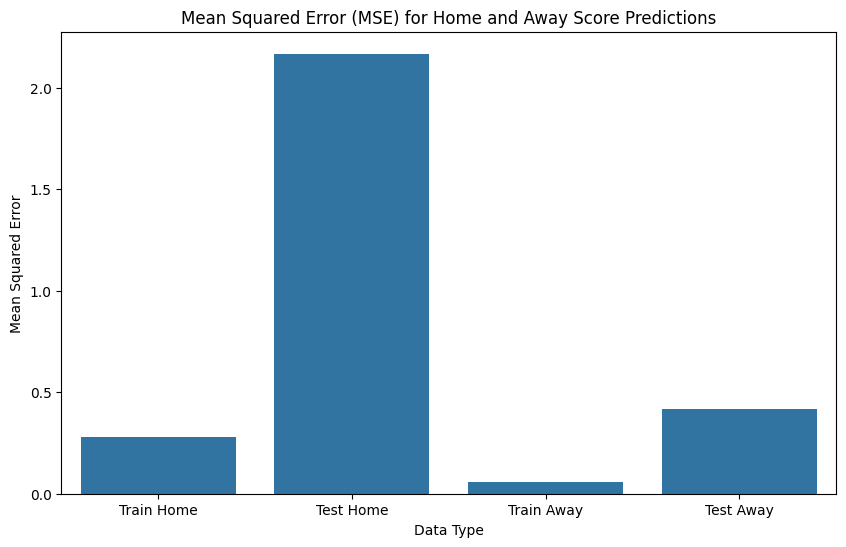

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

mse_data = pd.DataFrame({
    'MSE': [mean_squared_error(y_train_home, dtr_home.predict(X_train_home)),
            mean_squared_error(y_test_home, dtr_y_pred_home),
            mean_squared_error(y_train_away, dtr_away.predict(X_train_away)),
            mean_squared_error(y_test_away, dtr_y_pred_away)],
    'Type': ['Train Home', 'Test Home', 'Train Away', 'Test Away']
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='MSE', data=mse_data)
plt.title('Mean Squared Error (MSE) for Home and Away Score Predictions')
plt.ylabel('Mean Squared Error')
plt.xlabel('Data Type')
plt.show()

In [60]:
final_match_encoded = final_match.to_frame().T.reindex(columns=X_train_home.columns, fill_value=0)
final_match_encoded.iloc[:, 0:9] = 0
final_match_encoded['Home_Spain'] = 1.0
final_match_encoded['Away_England'] = 1.0
final_match_encoded['Home_Netherlands'] = 0.0
final_match_encoded['Ratings'] = df_euro_2024['Ratings'].mean()
final_match_encoded['Total Shots'] = df_euro_2024['Total Shots'].mean()
final_match_encoded['Possesion'] = df_euro_2024['Possesion'].mean()
final_match_encoded['Pass Succes'] = df_euro_2024['Pass Succes'].mean()
final_match_encoded['Dribbles'] = df_euro_2024['Dribbles'].mean()
final_match_encoded['Aerials Won'] = df_euro_2024['Aerials Won'].mean()
final_match_encoded['Tackles'] = df_euro_2024['Tackles'].mean()
final_match_encoded['Corners'] = df_euro_2024['Corners'].mean()
final_match_encoded['Dispossessed'] = df_euro_2024['Dispossessed'].mean()

home_score_prediction = dtr_home.predict(final_match_encoded)
away_score_prediction = dtr_away.predict(final_match_encoded)

print(f'Final score prediction: Spain {home_score_prediction[0]:.0f} - {away_score_prediction[0]:.0f} England')

if home_score_prediction[0] > away_score_prediction[0]:
  print('Congratulations Spanyol on becoming Euro 2024 champions')
elif home_score_prediction[0] < away_score_prediction[0]:
  print('Congratulations Inggris on becoming Euro 2024 champions')

Final score prediction: Spain 2 - 1 England
Congratulations Spanyol on becoming Euro 2024 champions


In [61]:
final_match_encoded.iloc[:, 0:9].reset_index(drop=True)

,Ratings,Total Shots,Possesion,Pass Succes,Dribbles,Aerials Won,Tackles,Corners,Dispossessed
0,6.79,14.416667,57.775,89.333333,9.666667,12.833333,13.666667,4.666667,8.083333




---

